## Cleaning
Drop column with extera catigorical data or data that just give bias to prefered players: usage, college year, ht, num, pfr, year, rec rank, pick, pik drafted, gbpm, offensive gdbm, defensive gdbm, type, Recruit Rank

In [2]:
#Alisha 
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', 70)

file_path = 'trainingData/CollegeBasketballPlayers2009-2021.csv'
dfBasketball = pd.read_csv(file_path)

# Inspect some of the data
dfBasketball.head()

dfBasketball.info()

dfBasketballTraining = dfBasketball.drop(columns=['usg','ht', 'num', 'pfr', 'year', 'Rec Rank', 'pick', 'gbpm', 'ogbpm', 'dgbpm', 'type'])

dfBasketballTraining.info()


C:\Users\HP\AppData\Local\Temp\ipykernel_26084\1196356588.py:17: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  dfBasketball = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61061 entries, 0 to 61060
Data columns (total 66 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   player_name                      61061 non-null  object 
 1   team                             61061 non-null  object 
 2   conf                             61061 non-null  object 
 3   GP                               61061 non-null  int64  
 4   Min_per                          61061 non-null  float64
 5   Ortg                             61061 non-null  float64
 6   usg                              61061 non-null  float64
 7   eFG                              61061 non-null  float64
 8   TS_per                           61061 non-null  float64
 9   ORB_per                          61061 non-null  float64
 10  DRB_per                          61061 non-null  float64
 11  AST_per                          61061 non-null  float64
 12  TO_per            

fill in missing values for dunks made

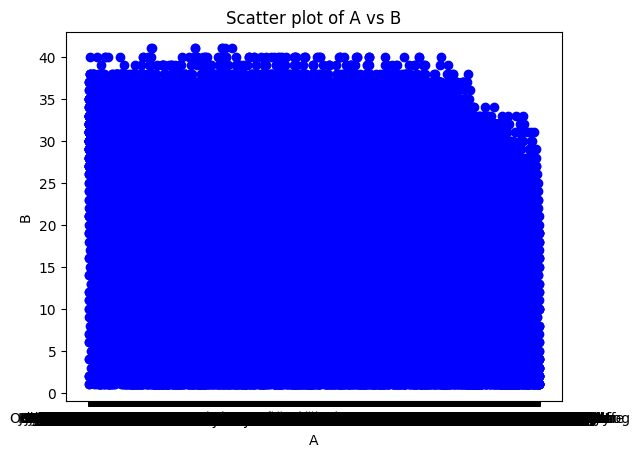

In [ ]:
#Josh 

fill in missing values for dunks attempt

In [ ]:
#Josh 

fill in missing values for midrange shots made

In [ ]:
#Heather 

fill in missing values for midrange attempts

In [ ]:
#Heather 

fill in missing values for rim shots made

KeyError: 'role_position'

Number of missing values in rimmade column: 6329
Number of missing values in rimmade column: 4243
Empty DataFrame
Columns: [player_name, team, conf, GP, Min_per, Ortg, usg, eFG, TS_per, ORB_per, DRB_per, AST_per, TO_per, FTM, FTA, FT_per, twoPM, twoPA, twoP_per, TPM, TPA, TP_per, blk_per, stl_per, ftr, yr, ht, num, porpag, adjoe, pfr, year, pid, type, Rec Rank, ast/tov, rimmade, rimmade+rimmiss, midmade, midmade+midmiss, rimmade/(rimmade+rimmiss), midmade/(midmade+midmiss), dunksmade, dunksmiss+dunksmade, dunksmade/(dunksmade+dunksmiss), pick, drtg, adrtg, dporpag, stops, bpm, obpm, dbpm, gbpm, mp, ogbpm, dgbpm, oreb, dreb, treb, ast, stl, blk, pts, Unnamed: 64, Unnamed: 65]
Index: []


fill in missing values for rim shots attempted 

In [ ]:
#Alisha 

check for players still missing over 15% of the data and drop 

In [ ]:
#Steve

check and fill any remaining nulls in the columns 

In [ ]:
#Steve

## Transform 